# Build Dataset

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
periodOfDayLabEncode = LabelEncoder()
df = pd.read_csv('../Data/OHA-2021-1.csv')
df['PeriodOfDayCode'] = periodOfDayLabEncode.fit_transform(df['PeriodOfDay'])
df.head()

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode
0,1,0,LateNight,Friday,1609470009,15,250.85478,343.17780,0.0,594.03260,2
1,1,0,LateNight,Friday,1609470024,15,246.37053,344.23290,0.0,590.60340,2
2,1,0,LateNight,Friday,1609470039,15,247.68944,342.91400,0.0,590.60340,2
3,1,0,LateNight,Friday,1609470054,15,249.00832,343.44160,0.0,592.44990,2
4,1,0,LateNight,Friday,1609470069,15,251.90991,344.76047,0.0,596.67035,2


<AxesSubplot:xlabel='PeriodOfDay'>

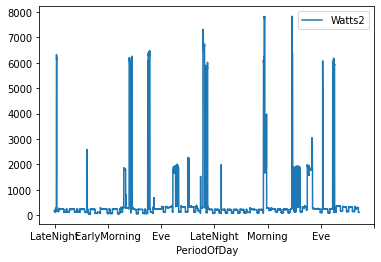

In [2]:
import matplotlib.pyplot as plt
df_day = df[ (df.DayOfWeek == "Saturday") & ( (df.Day == 2) | (df.Day == 9) )]
df_day.plot(x="PeriodOfDay", y="Watts2")

In [3]:
df_day.shape

(11434, 11)

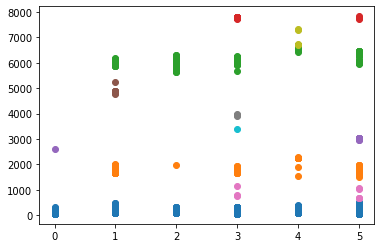

In [4]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X = df_day[['PeriodOfDayCode', 'Watts2']].to_numpy()
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [36]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
print(X[0], X[1], type(X))

[ 1.22515974 -0.95173116] [ 1.01630365 -1.72517506] <class 'numpy.ndarray'>


In [16]:
df[df.UnixTime >= 1610898760]

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode
95087,17,12,Morning,Sunday,1610898760,15,87.047400,4314.9136,0.0,4401.9610,3
95088,17,12,Morning,Sunday,1610898775,15,89.685200,5289.0527,0.0,5378.7380,3
95089,17,12,Morning,Sunday,1610898790,15,95.224580,5183.2770,0.0,5278.5015,3
95090,17,12,Morning,Sunday,1610898805,15,90.212760,5252.3870,0.0,5342.6000,3
95091,17,12,Morning,Sunday,1610898820,15,89.421425,5238.9346,0.0,5328.3560,3
95092,17,12,Morning,Sunday,1610898835,15,79.397780,5213.0845,0.0,5292.4820,3
95093,17,12,Morning,Sunday,1610898850,15,98.126160,5253.1787,0.0,5351.3047,3
95094,17,12,Morning,Sunday,1610898865,15,87.838740,5262.6750,0.0,5350.5137,3
95095,17,12,Morning,Sunday,1610898880,15,87.311180,5244.7380,0.0,5332.0490,3
95096,17,12,Morning,Sunday,1610898895,15,95.488360,5276.1280,0.0,5371.6157,3


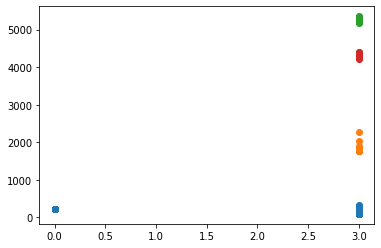

In [12]:
#lastLogs = df[-1000:]
lastLogs = df[df.UnixTime >= 1610898760]
X = lastLogs[['PeriodOfDayCode', 'Watts2']].to_numpy()
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()